# Aim
## HCUP-Analytics
My aim for this project is to create a prototype tool **HCUP-Analytics** which can use the data from HCUP database to help user with disease and hospital specific readmission insights.

Before we proceed into the methodology lets understand what HCUP is?

# HCUP Nationwide Readmissions Database (NRD)
The Healthcare Cost and Utilization Project (HCUP) Nationwide Readmissions Database (NRD) is a unique and powerful database designed to support various types of analyses of national readmission rates for all payers and the uninsured. The NRD includes discharges for patients with and without repeat hospital visits in a year and those who have died in the hospital. Repeat stays may or may not be related. The criteria to determine the relationship between hospital admissions is left to the analyst using the NRD. This database addresses a large gap in health care data - the lack of nationally representative information on hospital readmissions for all ages. Outcomes of interest include national readmission rates, reasons for returning to the hospital for care, and the hospital costs for discharges with and without readmissions. Unweighted, the NRD contains data from approximately 18 million discharges each year. Weighted, it estimates roughly 35 million discharges. Developed through a Federal-State-Industry partnership sponsored by the Agency for Healthcare Research and Quality, HCUP data inform decision making at the national, State, and community levels.

The NRD is drawn from HCUP State Inpatient Databases (SID) containing verified patient linkage numbers that can be used to track a person across hospitals within a State, while adhering to strict privacy guidelines. **The NRD is not designed to support regional, State-, or hospital-specific readmission analyses.**

The NRD contains more than 100 clinical and non-clinical data elements provided in a hospital discharge abstract. Data elements include but are not limited to: diagnoses, procedures, patient demographics (e.g., sex, age), expected source of payer, regardless of expected payer, including but not limited to Medicare, Medicaid, private insurance, self-pay, or those billed as ‘no charge, discharge month, quarter, and year, total charges, length of stay, and data elements essential to readmission analyses. The NIS excludes data elements that could directly or indirectly identify individuals.

# Methodology
I have researched and collected four data sets. One is about disease specific hospital readmission. Other two is readmission rates in hospital in US for different disease. One is hospital specific readmission rate in California.

## Data
- Diabetes 130 US hospitals for years 1999-2008 (https://archive.ics.uci.edu/dataset/296/diabetes+130-us+hospitals+for+years+1999-2008)

The dataset represents ten years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. Each row concerns hospital records of patients diagnosed with diabetes, who underwent laboratory, medications, and stayed up to 14 days. The goal is to determine the early readmission of the patient within 30 days of discharge. The problem is important for the following reasons. Despite high-quality evidence showing improved clinical outcomes for diabetic patients who receive various preventive and therapeutic interventions, many patients do not receive them. This can be partially attributed to arbitrary diabetes management in hospital environments, which fail to attend to glycemic control. Failure to provide proper diabetes care not only increases the managing costs for the hospitals (as the patients are readmitted) but also impacts the morbidity and mortality of the patients, who may face complications associated with diabetes.

- US Healthcare Readmissions and Mortality (https://www.kaggle.com/datasets/thedevastator/us-healthcare-readmissions-and-mortality)

**DESCRIPTION**

Readmissions and Deaths - National

**SUMMARY**

Readmissions and Deaths measures - national data. This data set includes national-level data for 30-day death and readmission measures.



- Readmissions and Deaths Hospit (2012-15) (https://data.world/health/readmissions-and-deaths-hospit)

**DESCRIPTION**

Readmissions and Deaths - National

**SUMMARY**

Readmissions and Deaths measures - national data. This data set includes national-level data for 30-day death and readmission measures.


- Readmissions and Deaths by Hospital - State of California (https://data.world/johnsnowlabs/readmissions-and-deaths-by-hospital-state-of-california)

**SUMMARY**

This dataset includes provider data for the hospital return days (or excess days in acute care) measures and the 30-day readmission measures, the unplanned readmissions measures, and the rate of unplanned hospital visits after an outpatient colonoscopy.


# Libraries

In [1]:
# required libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

# Data from UCL repository


In [2]:
# installing ucimlrepo module
# it is used to fethch data from UCL repository
# uncomment it to download the module
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

# Diabetes 130-US hospitals for years 1999-2008 data
Lets load Diabetes 130-US hospitals for years 1999-2008 data. The dataset represents ten years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. Each row concerns hospital records of patients diagnosed with diabetes, who underwent laboratory, medications, and stayed up to 14 days. The goal is to determine the early readmission of the patient within 30 days of discharge. The problem is important for the following reasons. Despite high-quality evidence showing improved clinical outcomes for diabetic patients who receive various preventive and therapeutic interventions, many patients do not receive them. This can be partially attributed to arbitrary diabetes management in hospital environments, which fail to attend to glycemic control. Failure to provide proper diabetes care not only increases the managing costs for the hospitals (as the patients are readmitted) but also impacts the morbidity and mortality of the patients, who may face complications associated with diabetes.

Lets load diabetes readmission data using ucimlrepo module

In [3]:
# fetch diabetes dataset
diab_readm = fetch_ucirepo(id=296)

# data (as pandas dataframes)
X = diab_readm.data.features
y = diab_readm.data.targets

# metadata of the diabetes data
print(diab_readm.metadata)

/usr/local/lib/python3.10/dist-packages/ucimlrepo/fetch.py:97: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


{'uci_id': 296, 'name': 'Diabetes 130-US hospitals for years 1999-2008', 'repository_url': 'https://archive.ics.uci.edu/dataset/296/diabetes+130-us+hospitals+for+years+1999-2008', 'data_url': 'https://archive.ics.uci.edu/static/public/296/data.csv', 'abstract': 'The dataset represents ten years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. Each row concerns hospital records of patients diagnosed with diabetes, who underwent laboratory, medications, and stayed up to 14 days. The goal is to determine the early readmission of the patient within 30 days of discharge.\nThe problem is important for the following reasons. Despite high-quality evidence showing improved clinical outcomes for diabetic patients who receive various preventive and therapeutic interventions, many patients do not receive them. This can be partially attributed to arbitrary diabetes management in hospital environments, which fail to attend to glycemic control. Failure to provide pro

In [4]:
# lets print variable information
print(diab_readm.variables)

                        name     role         type demographic  \
0               encounter_id       ID                     None   
1                patient_nbr       ID                     None   
2                       race  Feature  Categorical        Race   
3                     gender  Feature  Categorical      Gender   
4                        age  Feature  Categorical         Age   
5                     weight  Feature  Categorical        None   
6          admission_type_id  Feature  Categorical        None   
7   discharge_disposition_id  Feature  Categorical        None   
8        admission_source_id  Feature  Categorical        None   
9           time_in_hospital  Feature      Integer        None   
10                payer_code  Feature  Categorical        None   
11         medical_specialty  Feature  Categorical        None   
12        num_lab_procedures  Feature      Integer        None   
13            num_procedures  Feature      Integer        None   
14        

In [5]:
# head of the features
X.head(3)

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
0,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,No
1,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,...,No,No,Up,No,No,No,No,No,Ch,Yes
2,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,...,No,No,No,No,No,No,No,No,No,Yes


In [6]:
# head of target
y.head(3)

,readmitted
0,NO
1,>30
2,NO


In [7]:
# Lets combine the features and target
data_diab_comb = pd.concat([X,y], axis = 1)
data_diab_comb.shape

(101766, 48)

We see there is now 101766 rows and 48 columns. Indicating features and target are successfully merged.

# Lets check the information of the combined data


In [8]:
# information of the combined data
data_diab_comb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 48 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   race                      99493 non-null   object
 1   gender                    101766 non-null  object
 2   age                       101766 non-null  object
 3   weight                    3197 non-null    object
 4   admission_type_id         101766 non-null  int64 
 5   discharge_disposition_id  101766 non-null  int64 
 6   admission_source_id       101766 non-null  int64 
 7   time_in_hospital          101766 non-null  int64 
 8   payer_code                61510 non-null   object
 9   medical_specialty         51817 non-null   object
 10  num_lab_procedures        101766 non-null  int64 
 11  num_procedures            101766 non-null  int64 
 12  num_medications           101766 non-null  int64 
 13  number_outpatient         101766 non-null  int64 
 14  numb

lets analyse if there is any pattern in age, race, gender, weight and tme in hospital of the patients with their readmission status to the hospital.

In [9]:
# seperating data with variables of interet
data_diab_sel = data_diab_comb[['race','gender','age','weight','time_in_hospital','readmitted']]
# iformation of the selected data
data_diab_sel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   race              99493 non-null   object
 1   gender            101766 non-null  object
 2   age               101766 non-null  object
 3   weight            3197 non-null    object
 4   time_in_hospital  101766 non-null  int64 
 5   readmitted        101766 non-null  object
dtypes: int64(1), object(5)
memory usage: 4.7+ MB


We see required columns are successfully selected.

In [10]:
# summary of the data
print(data_diab_sel.describe())

       time_in_hospital
count     101766.000000
mean           4.395987
std            2.985108
min            1.000000
25%            2.000000
50%            4.000000
75%            6.000000
max           14.000000


Time in hospital is the days patient remain admitted in the hospital. It have mean 4.39 and std 2.98. To check its distribution lets make histogram

Text(0.5, 0, 'Time in hospital')

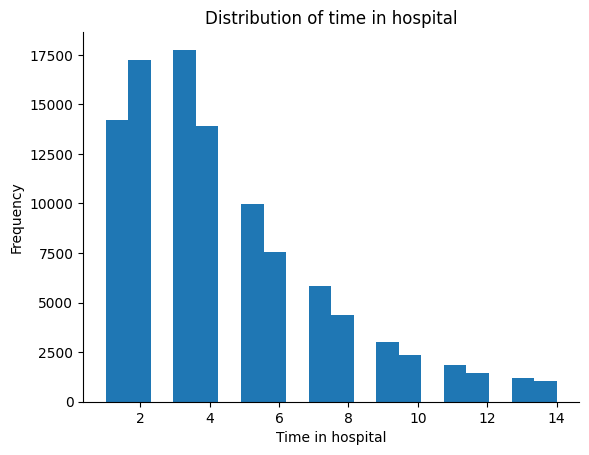

In [45]:
# histogram of time in hospital
data_diab_sel['time_in_hospital'].plot(kind='hist', bins=20, title='time_in_hospital')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title('Distribution of time in hospital')
plt.ylabel('Frequency')
plt.xlabel('Time in hospital')

We observe that most of the patient remain admitted in the hospital for 2 to 4 days.

# Univariate analysis
Lets check the proportions of categorical variables and distribution of continuous variables

## Readmission status

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64
NO     0.539119
>30    0.349282
<30    0.111599
Name: readmitted, dtype: float64


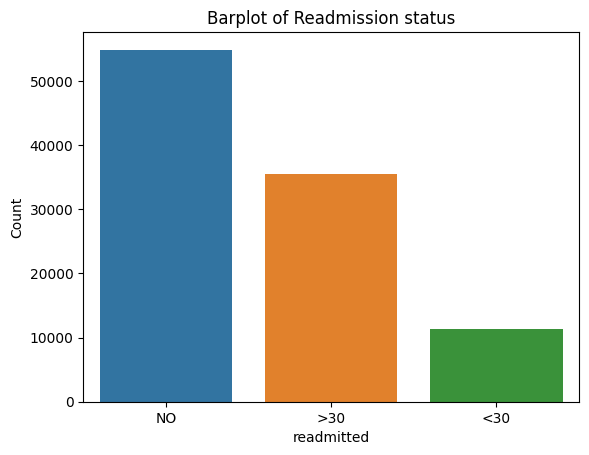

In [11]:
# count of readmision status
print(data_diab_sel['readmitted'].value_counts())

# proportion of readmission status
print(data_diab_sel['readmitted'].value_counts(normalize=True))

# countplot of readmitted status
sns.countplot(x='readmitted', data=data_diab_comb)
plt.ylabel('Count')
plt.title('Barplot of Readmission status')
plt.show()

- From the total 101766 patients 54864 are not admitted again, 35545 admitted again after 30 days and 11357 readmitted in less than 30 days.
- This proportion corresponds to 0.539, 0.359 and 0.111 respectively.

- We observe that maximum patients are who not admitted again, followed by who admitted after 30 days and least are those patients who admitted in less than 30 days of discharge from the hospital.

## Function for univariate analysis

Lets convert above code into a function

In [54]:
# function for univariate anaysis
def univariate_analyse(df, var):
    """(pd.dataframe, str)->None
    This function takes two argument a dataframe and a categorical variable
    contained in the data set. Then it prints the category count, proortions
    of the categories and then it plots the countplot the categories.
    """
    # count of the variable
    print(df[var].value_counts())

    # proportion of categories
    print(df[var].value_counts(normalize=True))

    # countplot of the var
    sns.countplot(x=var, data=df)
    plt.ylabel('Count')
    plt.title(f"Barplot of {var} status")
    plt.show()

# Univariate analysis of Race

Caucasian          76099
AfricanAmerican    19210
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64
Caucasian          0.764868
AfricanAmerican    0.193079
Hispanic           0.020474
Other              0.015137
Asian              0.006443
Name: race, dtype: float64


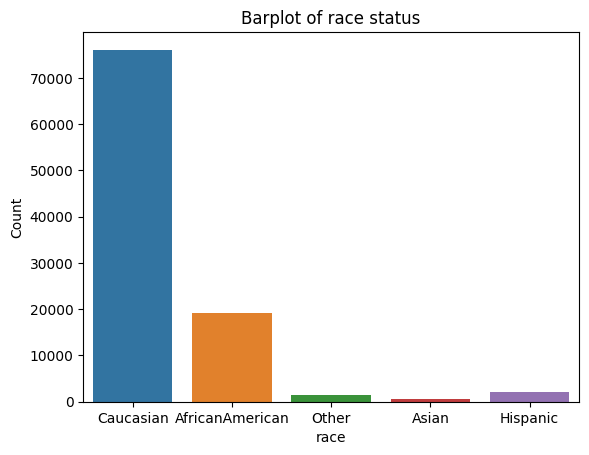

In [56]:
# univariate analysis for race
univariate_analyse(data_diab_sel, 'race')

- Caucasian: 76,099 cases, constituting approximately 76.49% of the total.
- AfricanAmerican: 19,210 cases, representing around 19.31% of the total.
- Hispanic: 2,037 cases, accounting for about 2.05% of the total.
- Other: 1,506 cases, making up approximately 1.51% of the total.
- Asian: 641 cases, comprising around 0.64% of the total

# Univariate analysis for age

[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64
[70-80)     0.256156
[60-70)     0.220928
[50-60)     0.169565
[80-90)     0.168986
[40-50)     0.095169
[30-40)     0.037095
[90-100)    0.027445
[20-30)     0.016282
[10-20)     0.006790
[0-10)      0.001582
Name: age, dtype: float64


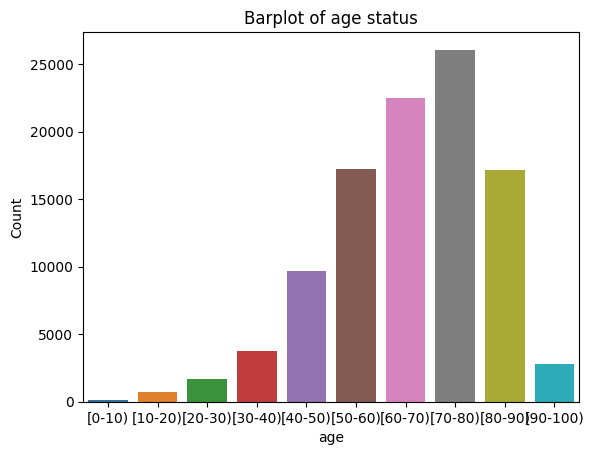

In [57]:
# univariate analysis for age
univariate_analyse(data_diab_sel, 'age')

The maximum number of patients are of 70-80 age group. The least is 0-10 year age group.

# Univariate analysis for gender

Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64
Female             0.537586
Male               0.462384
Unknown/Invalid    0.000029
Name: gender, dtype: float64


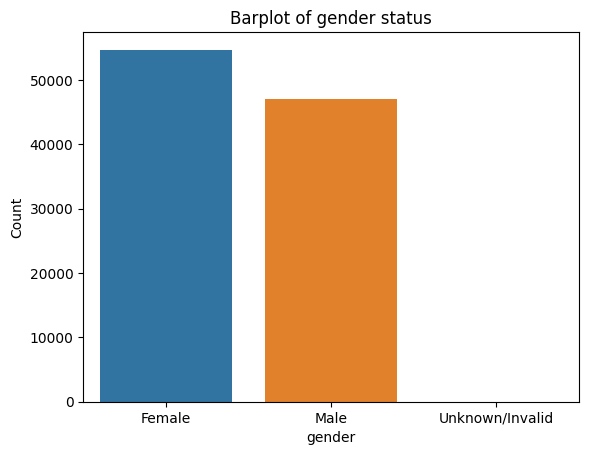

In [15]:
# univariate analysis for gender
univariate_analyse(data_diab_sel, 'gender')

Among the patients Females are in more number than male.

# Bivariate analysis

## Readmission vs gender

In [16]:
# pivot table of readmission and gender
# taking values as count
ptable=data_diab_sel.pivot_table(index='readmitted', columns='gender', aggfunc='size', fill_value=0)
ptable

gender,Female,Male,Unknown/Invalid
readmitted,,,
<30,6152,5205,0
>30,19518,16027,0
NO,29038,25823,3


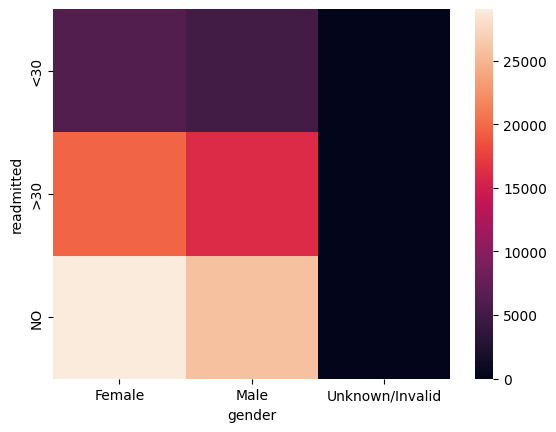

In [17]:
# heat map of the pivot table
sns.heatmap(ptable)
plt.show()

- The table shows among the patients who admitted after 30 days 19518 were female and 16027 were male.
- Among the patients who did not admitted again 29038 were female and	25823 were male.
- Among the patients who admitted before 30 days 6152 were female and	5205 were male.

## Function for bivariate analysis

In [18]:
# function for bivriate analysis
def bivariate_analyse(df, var1, var2):
    """(pd.dataframe, str, str)->None
        This function takes three argument a dataframe (df) containing
        other parameter as variables contained in this data. Then it
        prints the pivot table of value counts and then it plots a heatmap
        of the pivot table.
    """
    # pivot table
    ptable=df.pivot_table(index=var1, columns=var2, aggfunc='size', fill_value=0)
    print(ptable)

    # heatmap of the pivot table
    sns.heatmap(ptable)
    plt.show()


## Readmission vs race

race        AfricanAmerican  Asian  Caucasian  Hispanic  Other
readmitted                                                    
<30                    2155     65       8592       212    145
>30                    6634    161      27124       642    446
NO                    10421    415      40383      1183    915


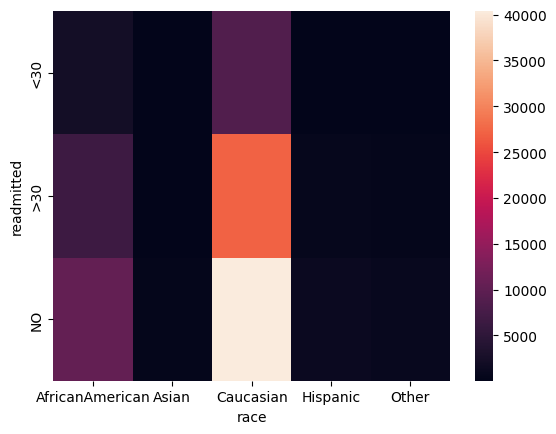

In [19]:
# bivariate analysis of readmission vs race
bivariate_analyse(data_diab_sel, 'readmitted', 'race')


Among the patients who got admitted after 30 days 6634 were AfricanAmerican. Similarly we can interpret the other row and column pair.

## Bivariate analysis of readmission vs age

age         [0-10)  [10-20)  [20-30)  [30-40)  [40-50)  [50-60)  [60-70)  \
readmitted                                                                 
<30              3       40      236      424     1027     1668     2502   
>30             26      224      510     1187     3278     5917     7897   
NO             132      427      911     2164     5380     9671    12084   

age         [70-80)  [80-90)  [90-100)  
readmitted                              
<30            3069     2078       310  
>30            9475     6223       808  
NO            13524     8896      1675  


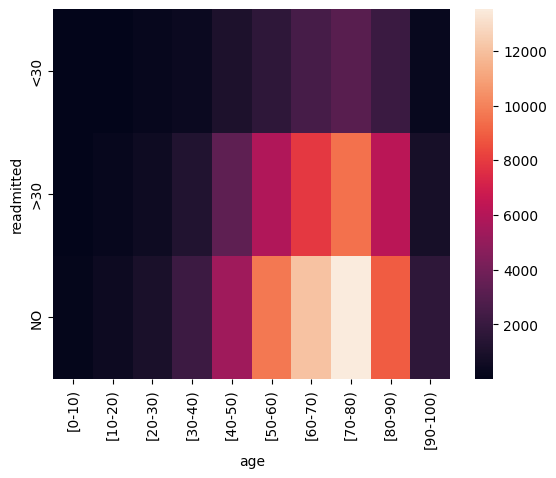

In [20]:
# bivariate analysis of readmission vs age
bivariate_analyse(data_diab_sel, 'readmitted', 'age')

# Hospital readmission in US hospitals (Study end date 2014)


In [21]:
# data from local drive
# downloaded from kagle
# study end date is 2015
data_hosp14 = pd.read_csv('/content/Readmissions_and_Deaths_-_Hospital.csv')

# a automatic index column is created lets drop that
data_hosp14.drop('index',axis=1, inplace=True)
data_hosp14.head(3)

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Measure Name,Measure ID,Compared to National,Denominator,Score,Lower Estimate,Higher Estimate,Footnote,Measure Start Date,Measure End Date,Location
0,230100,TAWAS ST JOSEPH HOSPITAL,200 HEMLOCK,TAWAS CITY,MI,48764,IOSCO,9893629301,Rate of readmission after discharge from hospi...,READM_30_HOSP_WIDE,No Different than the National Rate,438,13.9,12.6,15.6,NaN,07/01/2014,06/30/2015,"200 HEMLOCK\nTAWAS CITY, MI 48764\n(44.274911,..."
1,230121,MEMORIAL HEALTHCARE,826 WEST KING STREET,OWOSSO,MI,48867,SHIAWASSEE,9897235211,Rate of readmission after hip/knee replacement,READM_30_HIP_KNEE,No Different than the National Rate,150,4.0,2.8,5.7,NaN,07/01/2012,06/30/2015,"826 WEST KING STREET\nOWOSSO, MI 48867\n(43.00..."
2,230118,HURON MEDICAL CENTER,1100 SOUTH VAN DYKE ROAD,BAD AXE,MI,48413,HURON,9892699521,Pneumonia (PN) 30-Day Readmission Rate,READM_30_PN,No Different than the National Rate,205,16.7,13.8,19.9,NaN,07/01/2012,06/30/2015,"1100 SOUTH VAN DYKE ROAD\nBAD AXE, MI 48413\n(..."


In [22]:
# columns info
data_hosp14.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64764 entries, 0 to 64763
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Provider ID           64764 non-null  int64 
 1   Hospital Name         64764 non-null  object
 2   Address               64764 non-null  object
 3   City                  64764 non-null  object
 4   State                 64764 non-null  object
 5   ZIP Code              64764 non-null  int64 
 6   County Name           64582 non-null  object
 7   Phone Number          64764 non-null  int64 
 8   Measure Name          64764 non-null  object
 9   Measure ID            64764 non-null  object
 10  Compared to National  64764 non-null  object
 11  Denominator           64764 non-null  object
 12  Score                 64764 non-null  object
 13  Lower Estimate        64764 non-null  object
 14  Higher Estimate       64764 non-null  object
 15  Footnote              22979 non-null

We can see Denominator, score, lower estimate and higher estimate is in object form. Lets convert them to float format. Also Measure start date and measure end date are not in date format. Lets convert them to date format.

In [23]:
# type conversion of numeric variable
data_hosp14['Denominator'] = pd.to_numeric(data_hosp14['Denominator'], errors='coerce')
data_hosp14['Score'] = pd.to_numeric(data_hosp14['Score'], errors='coerce')
data_hosp14['Lower Estimate'] = pd.to_numeric(data_hosp14['Lower Estimate'], errors='coerce')
data_hosp14['Higher Estimate'] = pd.to_numeric(data_hosp14['Higher Estimate'], errors='coerce')

# type conversion of date variable
data_hosp14['Measure Start Date'] = pd.to_datetime(data_hosp14['Measure Start Date'])
data_hosp14['Measure End Date'] = pd.to_datetime(data_hosp14['Measure End Date'])

# datatypes of modified data
data_hosp14.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64764 entries, 0 to 64763
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Provider ID           64764 non-null  int64         
 1   Hospital Name         64764 non-null  object        
 2   Address               64764 non-null  object        
 3   City                  64764 non-null  object        
 4   State                 64764 non-null  object        
 5   ZIP Code              64764 non-null  int64         
 6   County Name           64582 non-null  object        
 7   Phone Number          64764 non-null  int64         
 8   Measure Name          64764 non-null  object        
 9   Measure ID            64764 non-null  object        
 10  Compared to National  64764 non-null  object        
 11  Denominator           41785 non-null  float64       
 12  Score                 41785 non-null  float64       
 13  Lower Estimate  

In [24]:
# head of the modified data
data_hosp14.head(3)

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Measure Name,Measure ID,Compared to National,Denominator,Score,Lower Estimate,Higher Estimate,Footnote,Measure Start Date,Measure End Date,Location
0,230100,TAWAS ST JOSEPH HOSPITAL,200 HEMLOCK,TAWAS CITY,MI,48764,IOSCO,9893629301,Rate of readmission after discharge from hospi...,READM_30_HOSP_WIDE,No Different than the National Rate,438.0,13.9,12.6,15.6,NaN,2014-07-01,2015-06-30,"200 HEMLOCK\nTAWAS CITY, MI 48764\n(44.274911,..."
1,230121,MEMORIAL HEALTHCARE,826 WEST KING STREET,OWOSSO,MI,48867,SHIAWASSEE,9897235211,Rate of readmission after hip/knee replacement,READM_30_HIP_KNEE,No Different than the National Rate,150.0,4.0,2.8,5.7,NaN,2012-07-01,2015-06-30,"826 WEST KING STREET\nOWOSSO, MI 48867\n(43.00..."
2,230118,HURON MEDICAL CENTER,1100 SOUTH VAN DYKE ROAD,BAD AXE,MI,48413,HURON,9892699521,Pneumonia (PN) 30-Day Readmission Rate,READM_30_PN,No Different than the National Rate,205.0,16.7,13.8,19.9,NaN,2012-07-01,2015-06-30,"1100 SOUTH VAN DYKE ROAD\nBAD AXE, MI 48413\n(..."


We can see data type conversion is sucessful and we have the data in correct formmat foe all columns.

# Hospital readmission in US hospitals (Study end date 2015)

In [25]:
# from data.world
# study end date of the data is 2015
data_hosp15 = pd.read_csv('https://query.data.world/s/st3ozfx3362wbgrfviyah63bzrgfpn?dws=00000')
data_hosp15.head(3)

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Measure Name,Measure ID,Compared to National,Denominator,Score,Lower Estimate,Higher Estimate,Footnote,Measure Start Date,Measure End Date,Location
0,230100,TAWAS ST JOSEPH HOSPITAL,200 HEMLOCK,TAWAS CITY,MI,48764,IOSCO,9893629301,Rate of readmission after discharge from hospi...,READM_30_HOSP_WIDE,No Different than the National Rate,438,13.9,12.6,15.6,NaN,07/01/2014,06/30/2015,"200 HEMLOCK\nTAWAS CITY, MI 48764\n(44.274911,..."
1,230121,MEMORIAL HEALTHCARE,826 WEST KING STREET,OWOSSO,MI,48867,SHIAWASSEE,9897235211,Rate of readmission after hip/knee replacement,READM_30_HIP_KNEE,No Different than the National Rate,150,4.0,2.8,5.7,NaN,07/01/2012,06/30/2015,"826 WEST KING STREET\nOWOSSO, MI 48867\n(43.00..."
2,230118,HURON MEDICAL CENTER,1100 SOUTH VAN DYKE ROAD,BAD AXE,MI,48413,HURON,9892699521,Pneumonia (PN) 30-Day Readmission Rate,READM_30_PN,No Different than the National Rate,205,16.7,13.8,19.9,NaN,07/01/2012,06/30/2015,"1100 SOUTH VAN DYKE ROAD\nBAD AXE, MI 48413\n(..."


In [26]:
data_hosp15['Measure Name'].value_counts()

Rate of readmission after discharge from hospital (hospital-wide)                4626
Rate of readmission after hip/knee replacement                                   4626
Pneumonia (PN) 30-Day Readmission Rate                                           4626
Rate of readmission for stroke patients                                          4626
Heart failure (HF) 30-Day Mortality Rate                                         4626
Pneumonia (PN) 30-Day Mortality Rate                                             4626
Death rate for chronic obstructive pulmonary disease (COPD) patients             4626
Heart failure (HF) 30-Day Readmission Rate                                       4626
Acute Myocardial Infarction (AMI) 30-Day Readmission Rate                        4626
Acute Myocardial Infarction (AMI) 30-Day Mortality Rate                          4626
Death rate for CABG                                                              4626
Death rate for stroke patients                        

In [27]:
# data info
data_hosp15.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64764 entries, 0 to 64763
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Provider ID           64764 non-null  int64 
 1   Hospital Name         64764 non-null  object
 2   Address               64764 non-null  object
 3   City                  64764 non-null  object
 4   State                 64764 non-null  object
 5   ZIP Code              64764 non-null  int64 
 6   County Name           64582 non-null  object
 7   Phone Number          64764 non-null  int64 
 8   Measure Name          64764 non-null  object
 9   Measure ID            64764 non-null  object
 10  Compared to National  64764 non-null  object
 11  Denominator           64764 non-null  object
 12  Score                 64764 non-null  object
 13  Lower Estimate        64764 non-null  object
 14  Higher Estimate       64764 non-null  object
 15  Footnote              22979 non-null

We need to similar type conversion in this data also.

In [28]:
# type conversion of numeric variable
data_hosp15['Denominator'] = pd.to_numeric(data_hosp15['Denominator'], errors='coerce')
data_hosp15['Score'] = pd.to_numeric(data_hosp15['Score'], errors='coerce')
data_hosp15['Lower Estimate'] = pd.to_numeric(data_hosp15['Lower Estimate'], errors='coerce')
data_hosp15['Higher Estimate'] = pd.to_numeric(data_hosp15['Higher Estimate'], errors='coerce')

# type conversion of date variable
data_hosp15['Measure Start Date'] = pd.to_datetime(data_hosp15['Measure Start Date'])
data_hosp15['Measure End Date'] = pd.to_datetime(data_hosp15['Measure End Date'])

# datatypes of modified data
data_hosp15.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64764 entries, 0 to 64763
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Provider ID           64764 non-null  int64         
 1   Hospital Name         64764 non-null  object        
 2   Address               64764 non-null  object        
 3   City                  64764 non-null  object        
 4   State                 64764 non-null  object        
 5   ZIP Code              64764 non-null  int64         
 6   County Name           64582 non-null  object        
 7   Phone Number          64764 non-null  int64         
 8   Measure Name          64764 non-null  object        
 9   Measure ID            64764 non-null  object        
 10  Compared to National  64764 non-null  object        
 11  Denominator           41785 non-null  float64       
 12  Score                 41785 non-null  float64       
 13  Lower Estimate  

We see all the columns are correctly converted to right type.

# California data

In [29]:
# lets load the data
data_hosp_cal = pd.read_csv('https://query.data.world/s/ppz7vzl5bludn7mp4gk64r75tks7jt?dws=00000')
data_hosp_cal.head(3)

,Provider_ID,Hospital_Name,NPI,Address,City,State,State_FIPS_Code,State_Abbreviation,ZIP_Code,County_FIPS_Code,...,Footnote,Measure_Start_Date,Measure_End_Date,ICD10_Code,ICD10_Description,HCPCS_Code,HCPCS_Description,Latitude,Longitude,Longitude_Latitude
0,50054,SAN GORGONIO MEMORIAL HOSPITAL,1.568470e+09,600 NORTH HIGHLAND SPRINGS AVENUE,BANNING,California,6,CA,92220,65,...,NaN,2013-07-01,2016-06-30,"I21.3, I21.4",ST elevation (STEMI) myocardial infarction of ...,C9606,Percutaneous transluminal revascularization of...,NaN,NaN,NaN
1,50054,SAN GORGONIO MEMORIAL HOSPITAL,1.568470e+09,600 NORTH HIGHLAND SPRINGS AVENUE,BANNING,California,6,CA,92220,65,...,NaN,2013-07-01,2016-06-30,I50.9,"Heart failure, unspecified",G9680,This code is for onsite acute care treatment o...,NaN,NaN,NaN
2,50054,SAN GORGONIO MEMORIAL HOSPITAL,1.568470e+09,600 NORTH HIGHLAND SPRINGS AVENUE,BANNING,California,6,CA,92220,65,...,NaN,2016-01-01,2016-12-31,G1021,Colorectal cancer screening; colonoscopy on in...,Z12.11,Encounter for screening for malignant neoplasm...,NaN,NaN,NaN


In [30]:
# data types
data_hosp_cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3762 entries, 0 to 3761
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Provider_ID           3762 non-null   int64  
 1   Hospital_Name         3762 non-null   object 
 2   NPI                   3520 non-null   float64
 3   Address               3762 non-null   object 
 4   City                  3762 non-null   object 
 5   State                 3762 non-null   object 
 6   State_FIPS_Code       3762 non-null   int64  
 7   State_Abbreviation    3762 non-null   object 
 8   ZIP_Code              3762 non-null   int64  
 9   County_FIPS_Code      3762 non-null   int64  
 10  County_Name           3762 non-null   object 
 11  Phone_Number          3762 non-null   int64  
 12  Measure_Name          3762 non-null   object 
 13  Measure_ID            3762 non-null   object 
 14  Compared_to_National  3137 non-null   object 
 15  Denominator          

We need to type convert the columns as above. Lets do the conversion

In [31]:
# type conversion of numeric variable
data_hosp_cal['Denominator'] = pd.to_numeric(data_hosp_cal['Denominator'], errors='coerce')
data_hosp_cal['Score'] = pd.to_numeric(data_hosp_cal['Score'], errors='coerce')
data_hosp_cal['Lower_Estimate'] = pd.to_numeric(data_hosp_cal['Lower_Estimate'], errors='coerce')
data_hosp_cal['Higher_Estimate'] = pd.to_numeric(data_hosp_cal['Higher_Estimate'], errors='coerce')

# type conversion of date variable
data_hosp_cal['Measure_Start_Date'] = pd.to_datetime(data_hosp_cal['Measure_Start_Date'])
data_hosp_cal['Measure_End_Date'] = pd.to_datetime(data_hosp_cal['Measure_End_Date'])

# datatypes of modified data
data_hosp_cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3762 entries, 0 to 3761
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Provider_ID           3762 non-null   int64         
 1   Hospital_Name         3762 non-null   object        
 2   NPI                   3520 non-null   float64       
 3   Address               3762 non-null   object        
 4   City                  3762 non-null   object        
 5   State                 3762 non-null   object        
 6   State_FIPS_Code       3762 non-null   int64         
 7   State_Abbreviation    3762 non-null   object        
 8   ZIP_Code              3762 non-null   int64         
 9   County_FIPS_Code      3762 non-null   int64         
 10  County_Name           3762 non-null   object        
 11  Phone_Number          3762 non-null   int64         
 12  Measure_Name          3762 non-null   object        
 13  Measure_ID        

# Mergging Hospital readmission data sets

## Subsetting the required data
From all the three hospital readmission data lets select the required columns. These columns are enough for knowing the mortality and readmission status of the hospital. I am preparing this data so that I can merge all the data of hospital into one after they have become in same format. Which later can be used as a large database containing hospital readmission and mortality information.

In [32]:
# required columns from hospital readmission data 2014
cols_req14 = ['Hospital Name', 'Address','County Name','ZIP Code','Phone Number','Measure Name','Measure End Date','Score']
data_hosp14_req = data_hosp14[cols_req14]
data_hosp14_req.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64764 entries, 0 to 64763
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Hospital Name     64764 non-null  object        
 1   Address           64764 non-null  object        
 2   County Name       64582 non-null  object        
 3   ZIP Code          64764 non-null  int64         
 4   Phone Number      64764 non-null  int64         
 5   Measure Name      64764 non-null  object        
 6   Measure End Date  64764 non-null  datetime64[ns]
 7   Score             41785 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 4.0+ MB


In [33]:
# required columns from hospital readmission data 2015
cols_req15 = ['Hospital Name', 'Address','County Name','ZIP Code','Phone Number','Measure Name','Measure End Date','Score']
data_hosp15_req = data_hosp15[cols_req15]
data_hosp15_req.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64764 entries, 0 to 64763
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Hospital Name     64764 non-null  object        
 1   Address           64764 non-null  object        
 2   County Name       64582 non-null  object        
 3   ZIP Code          64764 non-null  int64         
 4   Phone Number      64764 non-null  int64         
 5   Measure Name      64764 non-null  object        
 6   Measure End Date  64764 non-null  datetime64[ns]
 7   Score             41785 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 4.0+ MB


In [34]:
# required columns from hospital readmission data of california
cols_req_cal = ['Hospital_Name', 'Address','County_Name','ZIP_Code','Phone_Number','Measure_Name','Measure_End_Date','Score']
data_hosp_cal_req = data_hosp_cal[cols_req_cal]
data_hosp_cal_req.rename(columns = {'Hospital_Name':'Hospital Name','County_Name':'County Name','ZIP_Code':'ZIP Code',
                                    'Phone_Number':'Phone Number','Measure_Name':'Measure Name','Measure_End_Date':'Measure End Date'}, inplace=True)
data_hosp_cal_req.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3762 entries, 0 to 3761
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Hospital Name     3762 non-null   object        
 1   Address           3762 non-null   object        
 2   County Name       3762 non-null   object        
 3   ZIP Code          3762 non-null   int64         
 4   Phone Number      3762 non-null   int64         
 5   Measure Name      3762 non-null   object        
 6   Measure End Date  3762 non-null   datetime64[ns]
 7   Score             2435 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 235.2+ KB


<ipython-input-34-1e8218ef9593>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_hosp_cal_req.rename(columns = {'Hospital_Name':'Hospital Name','County_Name':'County Name','ZIP_Code':'ZIP Code',


## Merging Hospital readmission data 2014 and Hospital readmission data 2015

In [35]:
# merging the data files
data_merge1 = pd.merge(data_hosp14_req, data_hosp15_req,
                       on = ['Hospital Name', 'Address','County Name','ZIP Code','Phone Number','Measure Name','Measure End Date','Score'],
                       how = 'outer')
data_merge1.shape

(64764, 8)

In [36]:
# merging california data with merged data 1
data_merge2 = pd.merge(data_merge1, data_hosp_cal_req,
                       on = ['Hospital Name', 'Address','County Name','ZIP Code','Phone Number','Measure Name','Measure End Date','Score'],
                       how = 'outer')

data_merge2.shape

(68526, 8)

# Functions for the final tool

## Function to check if a string contain a word
I will use this function to filter merged data after checking if user intered disease is contained in the Measure name

In [37]:
def check_disease(measure, input_disease):
    """(str, str)->bool
    This function takes two argument input_disease is the name
    of disease the user want to search for. measure is the string
    of measure name which ciontains information of disease for which
    the readmission and mortality rate is given.

    >>> check_disease('Heart failure (HF) 30-Day Readmission Rate','heart')
    True

     >>> check_disease('Heart failure (HF) 30-Day Readmission Rate', 'kidney')
     False

     >>> check_disease('Rate of readmission for stroke patients', 'stroke')
     True

     >>> check_disease('Rate of readmission for stroke patients', 'heart')
     False
    """
    # making both input and measure to lower
    # to make it case insensitive
    input_dis_lwr = input_disease.lower()
    measure_lwr = measure.lower()
    # Spliting measure into list of words
    words = measure_lwr.split()
    # Checking if input word is in measure or not
    return input_dis_lwr in words

In [38]:
# testing function
import doctest
doctest.run_docstring_examples(check_disease, globals(), verbose=True)


PYDEV DEBUGGER WARNING:
sys.settrace() should not be used when the debugger is being used.
This may cause the debugger to stop working correctly.
If this is needed, please check: 
http://pydev.blogspot.com/2007/06/why-cant-pydev-debugger-work-with.html
to see how to restore the debug tracing back correctly.
Call Location:
  File "/usr/lib/python3.10/doctest.py", line 1501, in run
    sys.settrace(save_trace)



Finding tests in NoName
Trying:
    check_disease('Heart failure (HF) 30-Day Readmission Rate','heart')
Expecting:
    True
ok
Trying:
    check_disease('Heart failure (HF) 30-Day Readmission Rate', 'kidney')
Expecting:
    False
ok
Trying:
    check_disease('Rate of readmission for stroke patients', 'stroke')
Expecting:
    True
ok
Trying:
    check_disease('Rate of readmission for stroke patients', 'heart')
Expecting:
    False
ok


# function to take input from user

This function takes input from user about which disease they want to search for, what parameter they are intrested and for what year they are searching for

In [39]:
# function to filter data based on user input
def filter_data(hospital_data, disease, parameter, year):
    """(pd.dataframe, str, str, int)->pd.dataframe
    This function takes four argument. Hospital data is the merged dataframe
    of the hospital mortality and readmission. disease is the disease name.
    parameter is mortality or readmission. year is the year of the study.
    This function filters the hospital data based on those other disease and
    parameter values.
    """
    # filtering data for disease
    df = hospital_data[hospital_data['Measure Name'].apply(check_disease, input_disease=disease)]
    # filtering hospital data by parameter
    df = df[df['Measure Name'].apply(check_disease, input_disease=parameter)]
    # filtering data by year
    df = df[df['Measure End Date'].dt.year == year]
    # sorting the data by score value
    df = df.sort_values(by='Score')
    # returning the filtered data
    print(f"Top 3 hospitals having least {parameter} for {disease} cases are as below:-")
    return df.head(3)

In [43]:
# lets call filter_data function on some of the real parameter to see if its working as intended or not
filter_data(data_merge2, 'heart', 'readmission',2015)

Top 3 hospitals having least readmission for heart cases are as below:-


,Hospital Name,Address,County Name,ZIP Code,Phone Number,Measure Name,Measure End Date,Score
49508,LANCASTER GENERAL HOSPITAL,555 NORTH DUKE STREET,LANCASTER,17604,7172995511,Heart failure (HF) 30-Day Readmission Rate,2015-06-30,16.3
174,MCLAREN - NORTHERN MICHIGAN,416 CONNABLE AVE,EMMET,49770,2314874000,Heart failure (HF) 30-Day Readmission Rate,2015-06-30,16.5
20424,ST FRANCIS-DOWNTOWN,ONE ST FRANCIS DR,GREENVILLE,29601,8008055678,Heart failure (HF) 30-Day Readmission Rate,2015-06-30,17.0


In this final section I am going to create my main tool i.e. hcup_analyse. It should help the user with:-
1. disease specific readmission analysis, and
2. Hospital specific readmission and mortality information
A user should be able to inter parameters and see the results.
I am creating function as:-
- First of all user will have to choose what analysis they want disease specific analysis or hospital specific analysis.
- Then for selected option they should be able to enter univariate analysis for disease specific analysis and filter hospital based on entered parameter. The filtered data will be the best top 3 hospitals.

In [41]:
# defining hcup_analyse function
# it takes user input and then calls required functions whichever required
def hcup_analyse():
    """(None)->None
    This function takes input from user as what they want to analyse. then it calls the required function.
    The called function does the next things. Like calling univariate() will do the univariate analysis if the
    user is doing disease specific analysis.
    """
    analytics_type = input("Choose analytics type (1. Analyze Disease, 2. Analyze Hospital): ")

    if analytics_type == '1':
        # Disease Analytics
        analysis_type = input("Choose analysis type (1. Univariate, 2. Bivariate): ")
        # univariate analysis
        if analysis_type == '1':
            var = input("Enter the variable for univariate analysis: ")
            univariate_analyse(data_diab_sel, var)
            # bivariate analysis
        elif analysis_type == '2':
            var1 = input("Enter the first variable for bivariate analysis: ")
            var2 = input("Enter the second variable for bivariate analysis: ")
            bivariate_analyse(data_diab_sel, var1, var2)
        else:
            print("Invalid choice. Please choose 1 or 2.")
    elif analytics_type == '2':
        # Hospital Analytics
        disease = input("Enter the disease for hospital analytics: ")
        parameter = input("Enter the parameter (Mortality or Readmission): ")
        year = int(input("Enter the year: "))
        df = filter_data(data_merge2, disease, parameter, year)
        print(df)
    else:
        print("Invalid choice. Please choose 1 or 2.")

## HCUP-Analyse tool

## Some examples we can try to analyse

## 1. for analysing disease

Choose analytics type (1. Analyze Disease, 2. Analyze Hospital): 1

Choose analysis type (1. Univariate, 2. Bivariate): 2

Enter the first variable for bivariate analysis: age

Enter the second variable for bivariate analysis: gender


## 2. for analysing hospital
Choose analytics type (1. Analyze Disease, 2. Analyze Hospital): 2

Enter the disease for hospital analytics: heart

Enter the parameter (Mortality or Readmission): readmission

Enter the year: 2015


Choose analytics type (1. Analyze Disease, 2. Analyze Hospital): 1
Choose analysis type (1. Univariate, 2. Bivariate): 2
Enter the first variable for bivariate analysis: readmitted
Enter the second variable for bivariate analysis: race
race        AfricanAmerican  Asian  Caucasian  Hispanic  Other
readmitted                                                    
<30                    2155     65       8592       212    145
>30                    6634    161      27124       642    446
NO                    10421    415      40383      1183    915


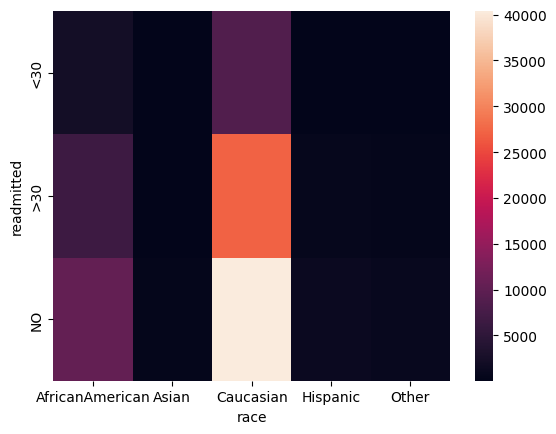

In [59]:
# lets call and do some analysis using hcup_analyse tool

hcup_analyse()

We see the hcup tool is working good. For now it have data of only diabetes for disease analysis. It could be extended to include more disease readmission data. The logic inside function can be more customised to provide user more confort. Like informative error value.